# Guideline :
We will first clean the dataset in order to have a suitable one to work with, then we will try to predict the y_labels.

During the lab sessions, we have seen different regression techniques :
- Linear regression using gradient descent
- Linear regression using stochastic gradient descent
- Least squares regression using normal equations
- Ridge regression using normal equations
- Logistic regression using gradient descent or SGD
- Regularized logistic regression using gradient descent or SGD

In order to determine which technique is the best for our data model, for each one we will:
- test the regression model on the data
- compute the training and test accuracy with RMSE
- determine how stable our model fit to the data, using the average, the mean, the min and max accuracy.

Finally, we will select afterwards the best model with the right parameters, and use this model to predict the y_label values in the given csv file for us to complete.

In [1]:
import sys
sys.path.insert(0, 'scripts')
from implementations import *
from model_selection import *
from visualization import *
from helpers_us import *
from proj1_helpers import *

## 1. Data preprocessing

In [2]:
y, X, dict_mask_jets_train, ids = process_data('Data/train.csv', inv_log=True)

## 2. Regression Techniques


In [8]:
def find_accuracy_linear(y, X, dict_mask_jets_train, weights):
    y_pred = np.zeros(y.shape)

    for i in range(len(dict_mask_jets_train)):
        xi = X[i]
        y_test_pred = predict_labels(weights[i], xi)
        y_pred[dict_mask_jets_train[i]] = y_test_pred
    accuracy = np.count_nonzero(y == y_pred) / len(y) * 100
    return accuracy

### 2.1 Linear regression using gradient descent

RMSE test:  0.8737956332658579
Accuracy:  74.51706535882293


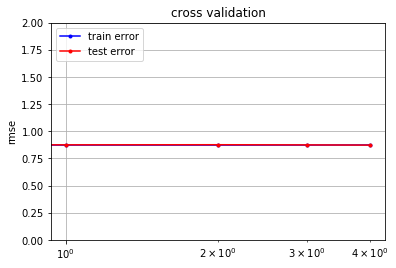

RMSE test:  0.8907278975014392
Accuracy:  68.94119164302296


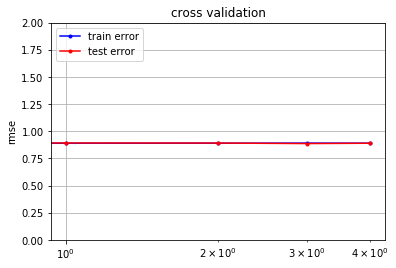

RMSE test:  0.8296914131927717
Accuracy:  74.85663082437276


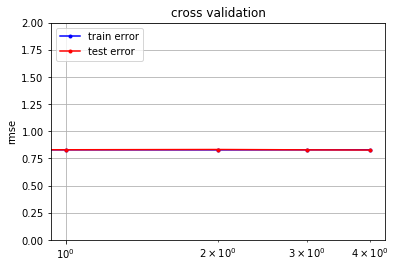

In [9]:
weights = []
for i in range(len(dict_mask_jets_train)):
    gamma = 0.01
    max_iters = 500
    inital_w = np.zeros(X[i].shape[1])
    w = cross_validation_demo(y[dict_mask_jets_train[i]], X[i], least_squares_GD, initial_w=inital_w, max_iters=max_iters, gamma=gamma)
    weights.append(w)

In [10]:
accuracy = find_accuracy_linear(y, X, dict_mask_jets_train, weights)
print(accuracy)

72.9196


### 2.2. Linear regression using stochastic gradient descent

RMSE test:  0.8785407922044737
Accuracy:  73.98858973075768


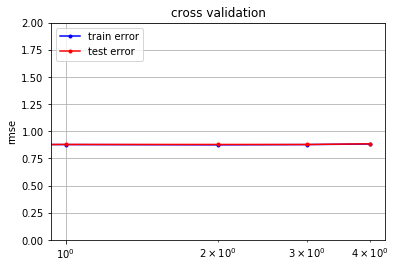

RMSE test:  0.8948241323272565
Accuracy:  68.97343306680423


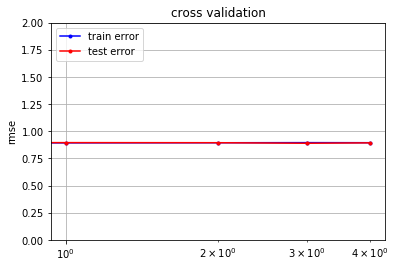

RMSE test:  0.8360100859287265
Accuracy:  74.19906258615937


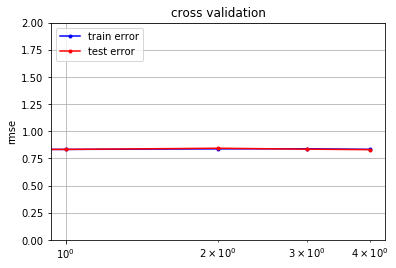

In [11]:
gamma = 0.01
max_iters = 500
weights = []
for i in range(len(dict_mask_jets_train)):
    gamma = 0.01
    max_iters = 500
    inital_w = np.zeros(X[i].shape[1])
    w = cross_validation_demo(y[dict_mask_jets_train[i]], X[i], least_squares_SGD, initial_w=inital_w, max_iters=max_iters, gamma=gamma)
    weights.append(w)

In [13]:
accuracy = find_accuracy_linear(y, X, dict_mask_jets_train, weights)
print(accuracy)

72.8048


### 2.3. Least squares regression using normal equations

RMSE test:  0.8687791844625034
Accuracy:  74.61815634070663


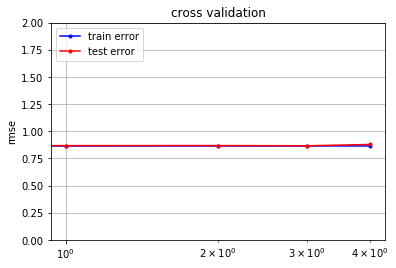

RMSE test:  0.8855613540869907
Accuracy:  69.65179262316224


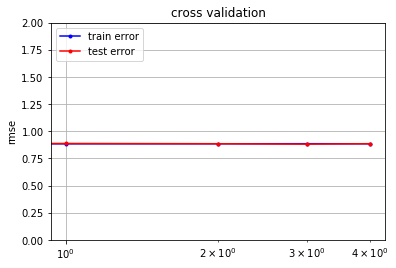

RMSE test:  0.8166248031460024
Accuracy:  76.58395368072789


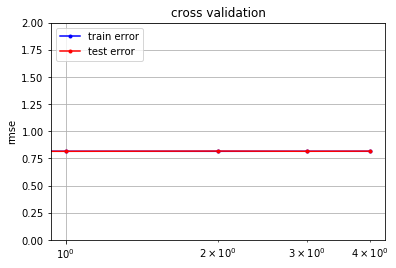

In [16]:
gamma = 0.01
max_iters = 500

weights = []
for i in range(len(dict_mask_jets_train)):
    gamma = 0.01
    max_iters = 500
    w = cross_validation_demo(y[dict_mask_jets_train[i]], X[i], least_squares)
    weights.append(w)

In [17]:
accuracy = find_accuracy_linear(y, X, dict_mask_jets_train, weights)
print(accuracy)

73.6788


### 2.4. Ridge regression

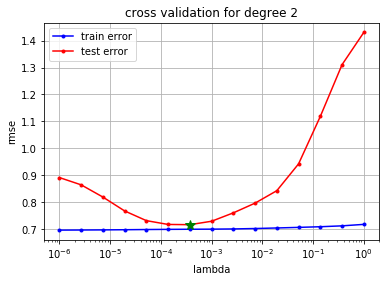

0.0003727593720314938 0.7163041908613489


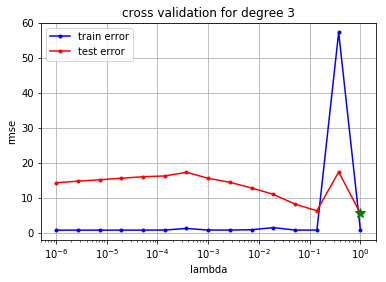

1.0 5.446315241956271


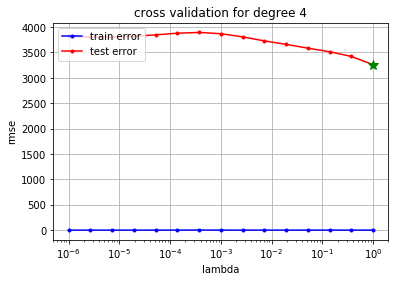

1.0 3260.5588911800714


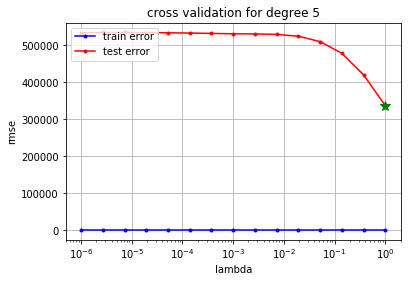

1.0 335677.598233635
Accuracy:  83.07710785491231
2 0.0003727593720314938


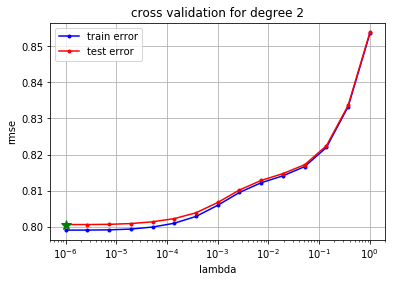

1e-06 0.8006225654042257


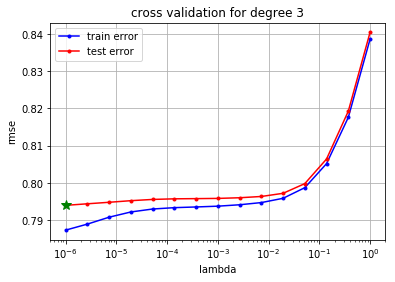

1e-06 0.794023656990651


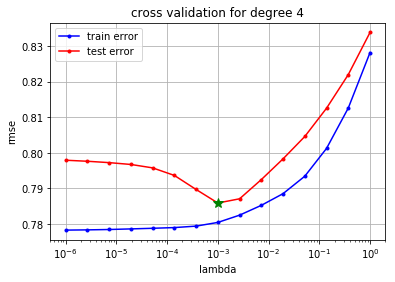

0.001 0.7859051691050959


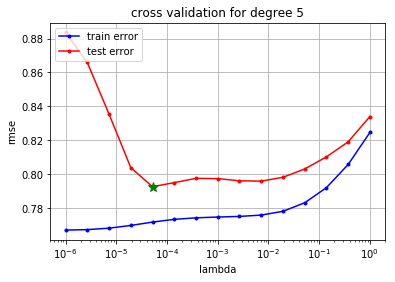

5.1794746792312125e-05 0.7925495210058576
Accuracy:  79.27628185288353
4 0.001


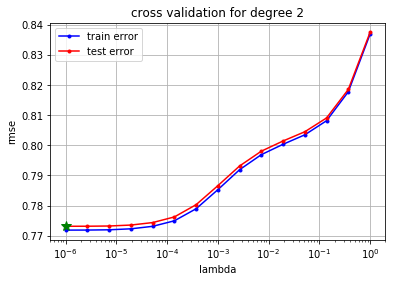

1e-06 0.7731541314472054


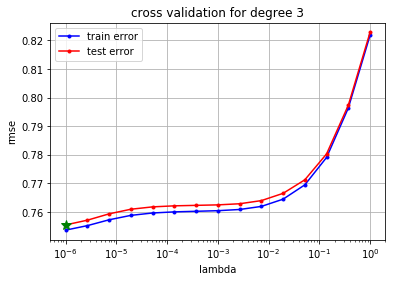

1e-06 0.7554748245010156


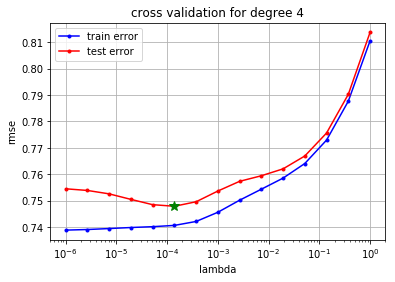

0.00013894954943731373 0.7479518855330577


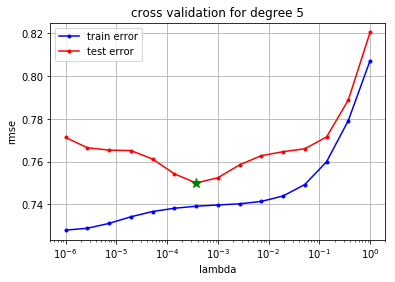

0.0003727593720314938 0.7500132554772835
Accuracy:  82.11193824097049
4 0.00013894954943731373


In [6]:
y, X, dict_mask_jets_train, ids = process_data('Data/train.csv', inv_log=True)
best_degrees = []
best_lambdas = []
for i in range(len(dict_mask_jets_train)):
    best_degree, best_lambda = best_model_ridge(y[dict_mask_jets_train[i]], X[i], 5, np.arange(2,5), np.logspace(-6, 0, 15), seed=56)
    best_degrees.append(best_degree)
    best_lambdas.append(best_lambda)
    print(best_degree, best_lambda)

In [7]:
best_weights = []
for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    yi = y[dict_mask_jets_train[i]]
    
    xi = build_poly(xi, best_degrees[i])
    w, _ = imp.ridge_regression(yi, xi, best_lambdas[i])
    best_weights.append(w)

In [8]:
y, X, dict_mask_jets_train, ids = process_data('Data/train.csv', inv_log=True)
y_pred = np.zeros(y.shape)
    
for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    xi = build_poly(xi, best_degrees[i])
    y_test_pred = predict_labels(best_weights[i], xi)
    y_pred[dict_mask_jets_train[i]] = y_test_pred
accuracy = np.count_nonzero(y == y_pred) / len(y) * 100
print(accuracy)

81.6708


In [6]:
y, X, dict_mask_jets_train, ids = process_data('Data/test.csv', inv_log=True)
y_pred = np.zeros(y.shape[0])

for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    xi = build_poly(xi, best_degrees[i])
    y_test_pred = predict_labels(best_weights[i], xi)
    y_pred[dict_mask_jets_train[i]] = y_test_pred
create_csv_submission(ids, y_pred, "prediction.csv")

### 2.5. Logistic regression using gradient descent

In [16]:
y, X, dict_mask_jets_train, ids = process_data('Data/train.csv', inv_log=True)

In [19]:
best_w = []
best_accuracy = []
for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    yi = y[dict_mask_jets_train[i]]
    yi = np.where(yi==-1, 0, yi)
    _,accuracy,w = cross_reg_logistic_regression(yi, xi, degree = 2, k_fold=6, 
                                         lambda_= 0.2, max_iters = 500, gamma = -1, batch=30, reg=False)
    best_w.append(w)
    best_accuracy.append(accuracy)
print(np.mean(best_accuracy))

0.7895283250484968


In [20]:
y_pred = np.zeros(y.shape)
    
for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    xi = build_poly(xi, 2)
    y_test_pred = predict_labels_logistic(best_w[i], xi)
    y_pred[dict_mask_jets_train[i]] = y_test_pred
accuracy = np.count_nonzero(y == y_pred) / len(y) * 100
print(accuracy)

80.7156


### 2.6. Regularized logistic regression using gradient descent

In [8]:
y, X, dict_mask_jets_train, ids = process_data('Data/train.csv', inv_log=True)

In [3]:
best_param = [[2,0.0072],[2,0.1389],[2,0.1389]] #degree, lambda for following accuracy (76.9,77.7,79.5) 

In [4]:
best_w = []
best_accuracy = []
for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    yi = y[dict_mask_jets_train[i]]
    _,accuracy,w = cross_reg_logistic_regression(yi, xi, degree = best_param[i][0], k_fold=6, 
                                         lambda_= best_param[i][1], max_iters = 100, gamma = -1, batch=15)
    best_w.append(w)
    best_accuracy.append(accuracy)
np.mean(best_accuracy)

0.7369125405605143

In [10]:
y, X, dict_mask_jets_train, ids = process_data('Data/test.csv', inv_log=True)

In [11]:
y_pred = np.zeros(y.shape)
    
for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    xi = build_poly(xi, best_param[i][0])
    y_test_pred = predict_labels_logistic(best_w[i], xi)
    y_pred[dict_mask_jets_train[i]] = y_test_pred
accuracy = np.count_nonzero(y == y_pred) / len(y) * 100
print(accuracy)

46.011882345073715


In [12]:
y_pred = np.zeros(y.shape[0])

for i in range(len(dict_mask_jets_train)):
    xi = X[i]
    xi = build_poly(xi, best_param[i][0])
    y_test_pred = predict_labels_logistic(best_w[i], xi)
    y_pred[dict_mask_jets_train[i]] = y_test_pred
create_csv_submission(ids, y_pred, "predictionPatriktest.csv")